In [ ]:
import pandas as pd
import numpy as np
from random import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
salaries = pd.read_csv("./clean_kaggle_data_2022.csv", low_memory = False, encoding = 'latin2')
salaries.shape

(8137, 298)

In [ ]:
salaries.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


# Question 1: Data Cleaning

- Drop the second row since it is about the question details
- Drop other information too if they are irrelevant to the task

In [ ]:
def CleanData(df):
    # Drop the first row (question details)
    df.drop(df.index[0], inplace=True)

    # Drop the second row (additional irrelevant info)
    df.drop(df.index[1], inplace=True)

    # Drop columns Q29, Q29_buckets, and Duration (in seconds)
    df.drop(columns=['Q29', 'Q29_buckets', 'Duration (in seconds)'],
            errors='ignore', inplace=True)

    return df

# Apply the cleaning function to the salaries DataFrame
salaries = CleanData(salaries)

# Check the shape and first few rows to verify
print(salaries.shape)
print(salaries.head())

(8135, 295)
      Q2   Q3                        Q4  Q5      Q6_1 Q6_2  \
1  55-59  Man                    France  No  Coursera  NaN   
3    70+  Man                 Australia  No  Coursera  NaN   
4  40-44  Man  United States of America  No  Coursera  NaN   
5  40-44  Man  United States of America  No  Coursera  NaN   
6  30-34  Man  United States of America  No  Coursera  NaN   

                   Q6_3 Q6_4     Q6_5     Q6_6  ...  \
1  Kaggle Learn Courses  NaN      NaN      NaN  ...   
3  Kaggle Learn Courses  NaN      NaN      NaN  ...   
4  Kaggle Learn Courses  NaN  Fast.ai  Udacity  ...   
5                   NaN  NaN      NaN  Udacity  ...   
6  Kaggle Learn Courses  NaN      NaN  Udacity  ...   

                             Q44_4  \
1  Kaggle (notebooks, forums, etc)   
3                              NaN   
4                              NaN   
5                              NaN   
6  Kaggle (notebooks, forums, etc)   

                                               Q44_5  \

###**Impute missing values (single column responses)**

1. Identify columns with single column responses

2. Address missing values in those columns

In [ ]:
def ImputingSingleColMissingValues(df):
    # Tips: Include Q29_Encoded (target) in the single_col_names
    # so that its row size stays same as other rows after data preprocessing
    #TODO: extract single column names and store them as a list
    single_col_names = [col for col in salaries.columns
                        if 'Q' in col and '_' not in col]
    single_col_names.append("Q29_Encoded")
    print(single_col_names)

    print("Percentage of null values: ")
    print(df[single_col_names].isnull().sum()*100/len(df))

    #TODO: address missing values in single column responses in df

    # Checking the distribution of responses for each column
    for column in single_col_names:
      df[column].fillna("Unknown", inplace=True)

    print("Percentage of null values (make sure they are all zeros): ")
    print(df[single_col_names].isnull().sum()*100/len(df))
    assert df[single_col_names].isnull().values.sum() == 0, \
        "There are still missing values remaining!"

    return df

# check distribution of responses in columns with high null responses
high_NaN_col = ['Q9', 'Q16', 'Q22', 'Q30', 'Q32', 'Q43']

for col in high_NaN_col:
    print(f"Distribution of {col}:")
    print(salaries[col].value_counts(dropna=False))  # Includes NaN in the count
    print()

salaries = ImputingSingleColMissingValues(salaries)

Distribution of Q9:
Q9
NaN    2940
Yes    2672
No     2523
Name: count, dtype: int64

Distribution of Q16:
Q16
Under 1 year                             1724
1-2 years                                1266
I do not use machine learning methods    1107
2-3 years                                 955
5-10 years                                808
NaN                                       684
4-5 years                                 634
3-4 years                                 591
10-20 years                               366
Name: count, dtype: int64

Distribution of Q22:
Q22
NaN                                           6522
 Kaggle datasets                               621
  TensorFlow Hub                               350
 Huggingface Models                            285
 PyTorch Hub                                   186
 Timm                                           76
Other storage services (i.e. google drive)      37
 NVIDIA NGC models                              32
 ONNX models   

###**Encode categorical features (single column responses)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the list of single column names
single_col_names = ['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9', 'Q11', 'Q16',
                    'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q30', 'Q32', 'Q43']

# Identify columns with very high number of unique values
for col in single_col_names:
    unique_count = salaries[col].nunique()
    print(f"Number of unique values in '{col}': {unique_count}")

# Mask values that appear less than 100 times in Q4 and Q29 columns
def mask_low_frequency(df, column_name, threshold=100):
    value_counts = df[column_name].value_counts()
    low_frequency_values = value_counts.index[value_counts < threshold]
    value_mask = df[column_name].isin(low_frequency_values)
    df.loc[value_mask, column_name] = "other"
    return df

# Apply the masking function only if the columns still exist
if 'Q4' in salaries.columns:
    salaries = mask_low_frequency(salaries, 'Q4')

# Define the list of ordinal columns
ordinal_columns = ['Q2', 'Q8', 'Q11', 'Q16', 'Q25', 'Q27', 'Q30']

# Initialize a LabelEncoder for ordinal columns
label_encoder = LabelEncoder()

# Apply label encoding to ordinal columns
for col in ordinal_columns:
    if col in salaries.columns:  # Ensure the column exists in the DataFrame
        salaries[col] = label_encoder.fit_transform(salaries[col].astype(str))

# One-hot encode the rest of the columns in `single_col_names`, excluding ordinal and already encoded columns
# Remove ordinal columns and Q29_Encoded from `single_col_names` first
non_ordinal_columns = [col for col in single_col_names if col not in ordinal_columns and col != 'Q29_Encoded']

# One-hot encode the remaining non-ordinal columns
salaries = pd.get_dummies(salaries, columns=non_ordinal_columns,
                          drop_first=True, dtype = int)

# Check the first few rows to verify the transformations
print(salaries.head())

Number of unique values in 'Q2': 11
Number of unique values in 'Q3': 5
Number of unique values in 'Q4': 58
Number of unique values in 'Q5': 1
Number of unique values in 'Q8': 7
Number of unique values in 'Q9': 3
Number of unique values in 'Q11': 7
Number of unique values in 'Q16': 9
Number of unique values in 'Q22': 10
Number of unique values in 'Q23': 14
Number of unique values in 'Q24': 15
Number of unique values in 'Q25': 5
Number of unique values in 'Q26': 7
Number of unique values in 'Q27': 6
Number of unique values in 'Q30': 7
Number of unique values in 'Q32': 14
Number of unique values in 'Q43': 6
   Q2      Q6_1 Q6_2                  Q6_3 Q6_4     Q6_5     Q6_6   Q6_7 Q6_8  \
1   8  Coursera  NaN  Kaggle Learn Courses  NaN      NaN      NaN  Udemy  NaN   
3  10  Coursera  NaN  Kaggle Learn Courses  NaN      NaN      NaN    NaN  NaN   
4   5  Coursera  NaN  Kaggle Learn Courses  NaN  Fast.ai  Udacity  Udemy  NaN   
5   5  Coursera  NaN                   NaN  NaN      NaN  Udacit

###**Handling categorical features (multi column responses)**

In [ ]:
#TODO: Identify multi-column responses

# Define multi_col_numbers as a list of column identifiers (just numbers)
multi_col_numbers = ['Q6', 'Q7', 'Q10', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17', 'Q18',
                     'Q19', 'Q20', 'Q21', 'Q28', 'Q29', 'Q31', 'Q33', 'Q34', 'Q35',
                     'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q44']

# Filter out the column names that are in multi_col_numbers, contain '_',
# and exclude 'Q29_Encoded'
multi_col_names = [col for col in salaries.columns
                   if any(multi_col in col for multi_col in multi_col_numbers)
                   and '_' in col and col != 'Q29_Encoded']

print("Multi-column names:", multi_col_names)


#TODO: Address missing values in the multi-column responses and and perform
# encoding for categorical features
def ImputingMultiColMissingValues(df):
    # Replace null values in multi_col_names with 0
    df[multi_col_names] = df[multi_col_names].fillna(0)

    # Verify that there are no remaining null values in multi_col_names
    print("Percentage of null values in multi column names (make sure they are all zeros): ")
    print(df[multi_col_names].isnull().sum() * 100 / len(df))
    assert df[multi_col_names].isnull().values.sum() == 0, \
        "There are still missing values in multi column names!"

    return df

salaries = ImputingMultiColMissingValues(salaries)

# One-hot encode the multi_col_names
salaries = pd.get_dummies(salaries, columns=multi_col_names, drop_first=True,
                          dtype = int)

print(salaries.head())

Multi-column names: ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13', 'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', '

###**Drop the target variable(s) and get the target variable**

In [ ]:
# Make sure there are no missing values remaining in the dataset
assert salaries.isnull().values.sum() == 0, \
    "There are still {} missing values remaining in salaries!".format(
        salaries.isnull().values.sum()
    )

In [ ]:
#TODO: get the target variable
target_variable = 'Q29_Encoded'
target_data = salaries[target_variable]

#TODO: Drop the target variables from the feature set
feature_set = salaries.drop(columns=[target_variable])
print(feature_set.head())

# Make sure the target variables are not included in the feature set
for col in feature_set.columns:
    assert 'Q29' not in col, \
        "Target variable ({}) is still in the dataset".format(col)

print(f"Feature set shape: {feature_set.shape}")
print(f"Target data shape: {target_data.shape}")

   Q2  Q8  Q11  Q16  Q25  Q27  Q30  Q3_Nonbinary  Q3_Prefer not to say  \
1   8   6    1    0    0    4    5             0                     0   
3  10   1    2    5    2    4    4             0                     0   
4   5   1    1    5    2    3    4             0                     0   
5   5   3    1    5    2    3    3             0                     0   
6   3   3    4    2    4    2    4             0                     0   

   Q3_Prefer to self-describe  ...  \
1                           0  ...   
3                           0  ...   
4                           0  ...   
5                           0  ...   
6                           0  ...   

   Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)  \
1                                                  0                
3                                                  1                
4                                                  1                
5                                                 

# Question 2: Exploratory Feature Analysis

- From Question 2 - Question 4, you should **NOT** peek at the test labels in any form!
- Assume that you do not know the target values (Q29_Encoded) on the test set

## Split data into training and test sets

In [ ]:
# You can use from sklearn.model_selection.train_test_split()

# Split the data into training and testing sets
train_df, test_df, y_train, y_test = train_test_split(
    feature_set,  # Features
    target_data,  # Target variable
    test_size=0.2,  # Test size (80% train, 20% test)
    random_state=42,  # Ensure reproducibility
    stratify=target_data  # Ensure that class distribution is preserved in both train and test sets
)

# Verify the shape of the resulting splits
print(f"Train feature set shape: {train_df.shape}")
print(f"Test feature set shape: {test_df.shape}")
print(f"Train target set shape: {y_train.shape}")
print(f"Test target set shape: {y_test.shape}")

print(f"Feature set shape: {feature_set.shape}")
print(f"Target data shape: {target_data.shape}")

Train feature set shape: (6508, 351)
Test feature set shape: (1627, 351)
Train target set shape: (6508,)
Test target set shape: (1627,)
Feature set shape: (8135, 351)
Target data shape: (8135,)


## **Feature Engineering/Generation**

- Create new feature(s) using existing features!

['Q4_United States of America', 'Q4_India', 'Q2', 'Q28_3_Build prototypes to explore applying machine learning to new areas', 'Q34_3_ Amazon Simple Storage Service (S3)  ', 'Q31_1_ Amazon Web Services (AWS) ', 'Q28_5_Experimentation and iteration to improve existing ML models', 'Q33_1_ Amazon Elastic Compute Cloud (EC2) ', 'Q27', 'Q26_20+']


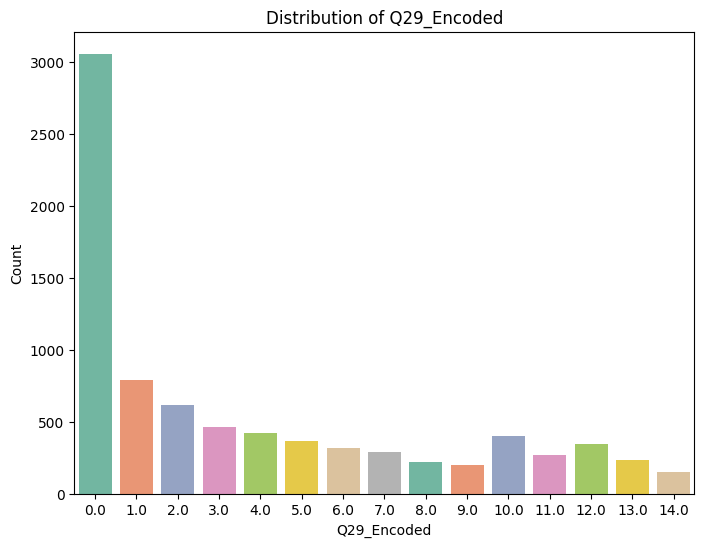

Updated feature set:
   Q2  Q8  Q11  Q16  Q25  Q27  Q30  Q3_Nonbinary  Q3_Prefer not to say  \
1   8   6    1    0    0    4    5             0                     0   
3  10   1    2    5    2    4    4             0                     0   
4   5   1    1    5    2    3    4             0                     0   
5   5   3    1    5    2    3    3             0                     0   
6   3   3    4    2    4    2    4             0                     0   

   Q3_Prefer to self-describe  ...  # of Q34 platforms used  \
1                           0  ...                        0   
3                           0  ...                        1   
4                           0  ...                        2   
5                           0  ...                        2   
6                           0  ...                        2   

   # of Q35 platforms used  # of Q36 platforms used  # of Q37 platforms used  \
1                        1                        0                        

In [ ]:
# initial exploratory data analysis

# Calculate the correlation matrix and select the top 10 columns most correlated with 'Q29_Encoded'
correlations = salaries.corr()['Q29_Encoded'].abs().sort_values(ascending=False)

# Exclude 'Q29_Encoded' itself from the list and select the top 10 correlated columns
top_10_columns = correlations.drop('Q29_Encoded').head(10).index.tolist()
print(top_10_columns)

# distribution of Q29_Encoded
plt.figure(figsize=(8, 6))
sns.countplot(x='Q29_Encoded', data=salaries, palette='Set2')
plt.title('Distribution of Q29_Encoded')
plt.xlabel('Q29_Encoded')
plt.ylabel('Count')
plt.show()

#TODO: Create new features (feature generation)

# Define multi_col_numbers as a list of column identifiers (just numbers)
multi_col_numbers = ['Q6', 'Q7', 'Q10', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17', 'Q18',
                     'Q19', 'Q20', 'Q21', 'Q28', 'Q29', 'Q31', 'Q33', 'Q34', 'Q35',
                     'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q44']

# Filter out the column names that are in multi_col_numbers, contain '_', and exclude 'Q29_Encoded'
multi_col_names = [col for col in feature_set.columns
                   if any(multi_col in col for multi_col in multi_col_numbers)
                   and '_' in col and col != 'Q29_Encoded']

# Loop through each unique "Q" prefix (e.g., Q6, Q7, Q8, etc.)
for q_prefix in multi_col_numbers:
    # Filter columns that belong to the current question (Q6_, Q7_, etc.)
    q_columns = [col for col in multi_col_names if col.startswith(q_prefix)]

    # Aggregate the data by summing across these columns for each row
    aggregated_column_name = f'# of {q_prefix} platforms used'

    # Add the aggregated column to both feature_set and train_df
    feature_set[aggregated_column_name] = feature_set[q_columns].sum(axis=1)
    train_df[aggregated_column_name] = train_df[q_columns].sum(axis=1)

# Display the updated feature set and train_df with new aggregated columns
print("Updated feature set:")
print(feature_set.head())
print(f"Feature set shape: {feature_set.shape}")

print("Updated training set:")
print(train_df.head())
print(f"Training set shape: {train_df.shape}")

print(f"Target data shape: {target_data.shape}")

## **Feature Selection**

- Select the features based on the criteria of your choice

In [ ]:
# selected_features = [] #TODO

from sklearn.linear_model import Lasso

# Instantiate Lasso with a chosen alpha value
lasso = Lasso(alpha=0.1)  # Try different alpha values to find the best one

# Fit the model
lasso.fit(train_df, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    "Feature": feature_set.columns,
    "Coefficient": coefficients
})

# Display the features with non-zero coefficients (selected by Lasso)
selected_features = feature_importance[feature_importance["Coefficient"] != 0]

# Extract the list of selected feature names
selected_feature_names = selected_features["Feature"].tolist()
print(selected_feature_names)

# Now, use the list of selected feature names to select the corresponding columns from the train_df
train_df_selected = train_df[selected_feature_names]
print(train_df_selected.head())

['Q2', 'Q11', 'Q27', 'Q30', 'Q4_India', 'Q4_United States of America', 'Q9_Unknown', 'Q23_Manager (Program, Project, Operations, Executive-level, etc)', 'Q26_20+', 'Q6_1_Coursera', 'Q21_8_ Kaggle datasets ', 'Q31_1_ Amazon Web Services (AWS) ', 'Q34_3_ Amazon Simple Storage Service (S3)  ', 'Q35_1_MySQL ', 'Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)', '# of Q14 platforms used', '# of Q17 platforms used', '# of Q18 platforms used', '# of Q19 platforms used', '# of Q28 platforms used', '# of Q33 platforms used', '# of Q34 platforms used']
      Q2  Q11  Q27  Q30  Q4_India  Q4_United States of America  Q9_Unknown  \
1220   4    0    3    5         0                            1           1   
3491   7    1    2    5         1                            0           0   
346    2    4    1    1         0                            0           0   
6450   1    5    2    4         0                            0           0   
7887   3    5    5    1         1                  

In [ ]:
train_df_selected = train_df[selected_feature_names]
print(train_df_selected.head())

      Q2  Q11  Q27  Q30  Q4_India  Q4_United States of America  Q9_Unknown  \
1220   4    0    3    5         0                            1           1   
3491   7    1    2    5         1                            0           0   
346    2    4    1    1         0                            0           0   
6450   1    5    2    4         0                            0           0   
7887   3    5    5    1         1                            0           1   

      Q23_Manager (Program, Project, Operations, Executive-level, etc)  \
1220                                                  0                  
3491                                                  1                  
346                                                   0                  
6450                                                  0                  
7887                                                  0                  

      Q26_20+  Q6_1_Coursera  ...  \
1220        0              1  ...   
3491        

## **Visualization**

- Make visualization to better understand your data

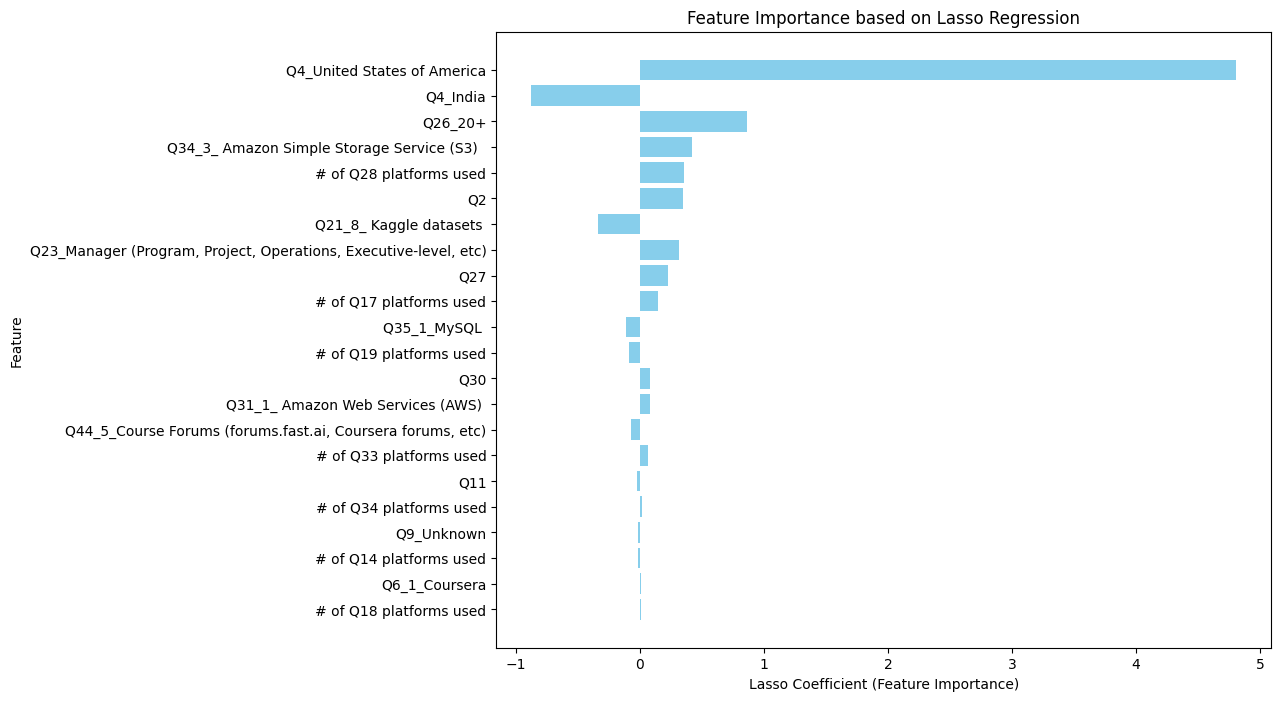

In [ ]:

# Ensure 'selected_features' DataFrame is sorted by the absolute value of the
# coefficients for better visualization
selected_features = selected_features.sort_values(by="Coefficient",
                                                  key=abs, ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(selected_features["Feature"], selected_features["Coefficient"],
         color='skyblue')
plt.xlabel("Lasso Coefficient (Feature Importance)")
plt.ylabel("Feature")
plt.title("Feature Importance based on Lasso Regression")
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()

## **Apply the same feature engineering/selection to test data**

In [ ]:
#TODO: Feature generation code you applied to the training data

# Assuming the same multi_col_numbers and multi_col_names you used for train_df
multi_col_numbers = ['Q6', 'Q7', 'Q10', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17', 'Q18',
                     'Q19', 'Q20', 'Q21', 'Q28', 'Q29', 'Q31', 'Q33', 'Q34', 'Q35',
                     'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q44']

# Filter out the column names that are in multi_col_numbers, contain '_',
# and exclude 'Q29_Encoded'
multi_col_names = [col for col in test_df.columns
                   if any(multi_col in col for multi_col in multi_col_numbers)
                   and '_' in col and col != 'Q29_Encoded']

# Loop through each unique "Q" prefix (e.g., Q6, Q7, Q8, etc.)
for q_prefix in multi_col_numbers:
    # Filter columns that belong to the current question (Q6_, Q7_, etc.)
    q_columns = [col for col in multi_col_names if col.startswith(q_prefix)]

    # Aggregate the data by summing across these columns for each row
    aggregated_column_name = f'# of {q_prefix} platforms used'
    test_df[aggregated_column_name] = test_df[q_columns].sum(axis=1)

# Display the updated test set with new aggregated columns
print(test_df[aggregated_column_name].head())  # Print the last created aggregated column
print(test_df.head())

# Leave selected features
test_df_selected = test_df[selected_feature_names]

# Check the selected test set data
print(test_df_selected.head())

6096    4
6182    0
4737    4
2601    2
3423    5
Name: # of Q44 platforms used, dtype: int64
      Q2  Q8  Q11  Q16  Q25  Q27  Q30  Q3_Nonbinary  Q3_Prefer not to say  \
6096   3   3    4    5    2    2    4             0                     0   
6182   3   2    5    6    4    1    0             0                     0   
4737   7   0    1    5    3    1    5             0                     0   
2601   2   3    5    6    0    5    1             0                     0   
3423   5   3    3    1    2    3    5             0                     0   

      Q3_Prefer to self-describe  ...  # of Q34 platforms used  \
6096                           0  ...                        1   
6182                           0  ...                        0   
4737                           0  ...                        1   
2601                           0  ...                        1   
3423                           0  ...                        1   

      # of Q35 platforms used  # of Q36 platfo

In [ ]:
X_train = train_df_selected.values
X_test = test_df_selected.values
y_train = y_train
y_test = y_test

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6508, 22)
y_train shape: (6508,)
X_test shape: (1627, 22)
y_test shape: (1627,)


# Question 3: Model Implementation

## Implement Ordinal Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

class OrdinalLogisticRegression():
    def __init__(self, max_iter=100, C=1):
        self.C = C  # Regularization strength for Logistic Regression
        self.max_iter = max_iter

        self.classes_ = []
        self.models_ = []
        self.coef_ = []  # To store coefficients of each model
        self.intercept_ = []  # To store intercepts of each model

    def fit(self, X, y):
        self.classes_ = sorted(np.unique(y))
        self.models_ = []
        self.coef_ = []  # Reset the coefficients list
        self.intercept_ = []  # Reset the intercepts list

        # Train k-1 binary logistic regression models
        for i, c in enumerate(self.classes_[:-1]):  # We need only k-1 classifiers
            y_i = (y > c).astype(int)
            model = LogisticRegression(C=self.C, max_iter=self.max_iter)
            model.fit(X, y_i)
            self.models_.append(model)

            # Store coefficients and intercept for each model
            self.coef_.append(model.coef_)
            self.intercept_.append(model.intercept_)

        return self

    def predict_proba(self, X):
        assert len(self.models_) > 0, "Model is not fitted yet. Run .fit() first."

        # Predicted probabilities for k-1 binary logistic regression models (initialize placeholders)
        binary_probabilities = np.empty((X.shape[0], len(self.models_), 2), dtype=float)

        # Make predictions of k-1 binary logistic regression models
        for i, model in enumerate(self.models_):
            binary_probabilities[:, i] = model.predict_proba(X)

        # Compute the probabilities to be in each class
        k = len(self.classes_)
        proba = np.empty((X.shape[0], k), dtype=float)  # predicted probabilities for all the data in X

        proba[:, 0] = binary_probabilities[:, 0, 0]  # 0th probability

        for i in range(1, k-1):
            proba[:, i] = binary_probabilities[:, i, 0] - binary_probabilities[:, i-1, 0]

        proba[:, -1] = binary_probabilities[:, k-2, 1]  # (k-1)th probability

        assert (proba.sum(axis=1) == 1).all(), 'There is a problem in the probability computation'
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def get_params(self, deep=True):
        return {'max_iter': self.max_iter, 'C': self.C, 'penalty': self.penalty}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Run k-fold cross validation

- Report the average/variance of accuracies across folds

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define your model
model = LogisticRegression(max_iter=100)

# Define the KFold cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(model, train_df, y_train, cv=kf)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")
print(f"Variance of cross-validation scores: {cv_scores.var()}")

Cross-validation scores: [0.36866359 0.36866359 0.37327189 0.3609831  0.34254992 0.37173579
 0.40399386 0.41321045 0.37230769 0.37692308]
Average cross-validation score: 0.37523029658513524
Variance of cross-validation scores: 0.00036545205708010025


## Bias-variance trade-off

[bias_variance_decomp.py](https://github.com/rasbt/mlxtend/blob/master/mlxtend/evaluate/bias_variance_decomp.py)

Below is a function you can use to compute the bias and variance of your ordinal logistic regression model. Using this function, analyze the ordinal logistic regression model performance based on bias-variance trade-off.

In [ ]:
### NOTE: You don't need to change anything in this code block! ###

def _draw_bootstrap_sample(rng, X, y):
    sample_indices = np.arange(X.shape[0])
    bootstrap_indices = rng.choice(
        sample_indices, size=sample_indices.shape[0], replace=True
    )
    return X[bootstrap_indices], y[bootstrap_indices]

def bias_variance_decomp(
    estimator,
    X_train,
    y_train,
    X_test,
    y_test,
    num_rounds=10,
    random_seed=0
):
    """
    estimator : object
        A classifier or regressor object or class implementing both a
        `fit` and `predict` method similar to the scikit-learn API.

    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.

    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.

    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.

    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_test` examples.

    num_rounds : int (default=10)
        Number of bootstrap rounds (sampling from the training set)
        for performing the bias-variance decomposition. Each bootstrap
        sample has the same size as the original training set.

    random_seed : int (default=0)
        Random seed for the bootstrap sampling used for the
        bias-variance decomposition.

    Returns
    ----------
    avg_bias, avg_var : returns the average bias, and average bias (all floats),
                        where the average is computed over the data points
                        in the test set.

    """
    loss = "mse"

    for ary in (X_train, y_train, X_test, y_test):
        assert type(ary) == np.ndarray, \
            "X_train, y_train, X_test, y_test have to be NumPy array. \
            If e.g., X_train is a pandas DataFrame, convert it to NumPy array \
            via X_train=X_train.values."

    rng = np.random.RandomState(random_seed)

    # All the predictions across different rounds
    all_pred = np.zeros((num_rounds, y_test.shape[0]), dtype=np.float64)

    for i in range(num_rounds):
        # Randomly sample training data
        X_boot, y_boot = _draw_bootstrap_sample(rng, X_train, y_train)

        # Fit the model using the randomly sampled data
        pred = estimator.fit(X_boot, y_boot).predict(X_test)
        all_pred[i] = pred

    # Mean prediction across runs using different dataset for each data point
    main_predictions = np.mean(all_pred, axis=0)

    # Average bias across different rounds
    avg_bias = np.sum((main_predictions - y_test) ** 2) / y_test.size

    # Average variance across different rounds
    avg_var = np.sum((main_predictions - all_pred) ** 2) / all_pred.size

    return avg_bias, avg_var

X_train shape: (6508, 22)
y_train shape: (6508,)
X_test shape: (1627, 22)
y_test shape: (1627,)


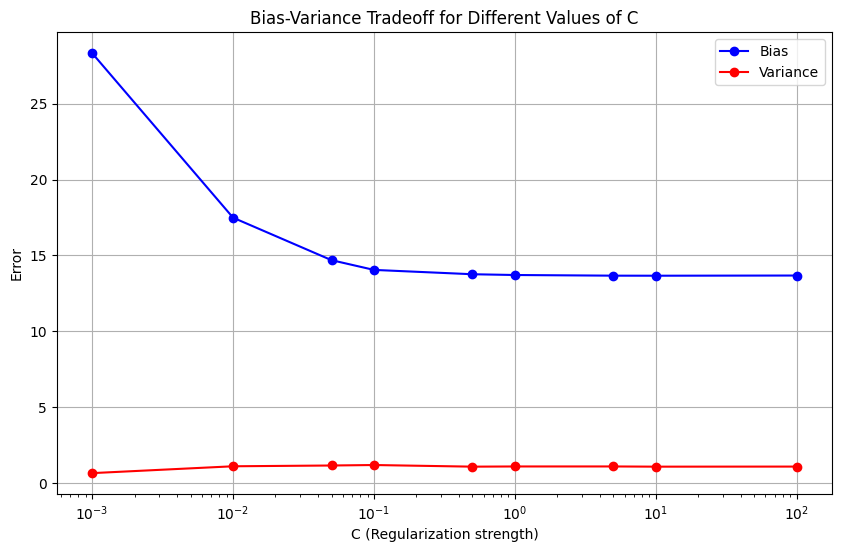

In [ ]:
# Make sure to convert to numpy arrays explicitly
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

"""
# Usage example
model = OrdinalLogisticRegression()
avg_bias, avg_var = \
    bias_variance_decomp(model, X_train, y_train, X_test, y_test, num_rounds=10, random_seed=0)
"""

import matplotlib.pyplot as plt
import numpy as np

# List of C values to test
C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]

# Arrays to store bias and variance for each C value
bias_values = []
var_values = []

# Loop through each C value and compute bias and variance
for C_val in C_values:
    model = OrdinalLogisticRegression(C=C_val)
    avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train,
                                  X_test, y_test, num_rounds=10, random_seed=0)

    bias_values.append(avg_bias)
    var_values.append(avg_var)

# Plot bias vs. variance for each C
plt.figure(figsize=(10, 6))
plt.plot(C_values, bias_values, label='Bias', marker='o', color='blue')
plt.plot(C_values, var_values, label='Variance', marker='o', color='red')
plt.xscale('log')  # Use logarithmic scale for C
plt.xlabel('C (Regularization strength)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff for Different Values of C')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# print(avg_bias, avg_var)

In [ ]:
#TODO: Discuss bias-variance trade-off of your ordinal logistic regression model

# Question 4: Model Tuning

- What are the hyperparameters we can potentially set for our ordinal logistic regression model?
- Which hyperparameters seem to be worthwhile to tune?

## Grid Search

- Grid search will take time to complete - but if it does not finish in a few hours, you're probably trying too many combinations
- A recommended approach is to try a small number of combinations with a wide range first (for continuous value hyperparameters)! Then gradually increase the points that seem to be near optimal

In [ ]:
#TODO: Perform grid search using a proper criteria and identify the best parameter set

from sklearn.model_selection import GridSearchCV

# Load data
X = feature_set
y = target_data
print(f"Feature set shape: {X.shape}")
print(f"Target data shape: {y.shape}")

# Define the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Scoring metric
                           n_jobs=-1,  # Use all CPU cores
                           verbose=1)  # Show progress during grid search

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters and cross-validation score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Feature set shape: (8135, 377)
Target data shape: (8135,)
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.01, 'max_iter': 100}
Best Cross-Validation Score: 0.39397664413030115


## Visualize the feature importance of your model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the training and testing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now use the scaled data to train the model
model = OrdinalLogisticRegression(C=1.0)
model.fit(X_train_scaled, y_train)

# Best hyperparameters identified from grid search
best_params = {'C': 0.01, 'max_iter': 100}

# Initialize the OrdinalLogisticRegression model with the best hyperparameters
model = OrdinalLogisticRegression(C=best_params['C'],
              max_iter=best_params['max_iter'])

# Fit the model to the training data
model = model.fit(X_train, y_train)